# Formula 1 EDA & ML

DataSource: https://www.kaggle.com/datasets/tusharsingh1411/formula1-data-1950-2022?select=GrandPrix_races_details_1950_to_2022.csv

## Loading and Reading the Data

In [81]:
import os
import sklearn
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime, time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import urllib.request
from bs4 import BeautifulSoup
from html.parser import HTMLParser

In [82]:
gp_drivers = 'https://raw.githubusercontent.com/nahariaprateek/SportAnalytics/main/Formula%201%20EDA%20%26%20ML/Data/GrandPrix_drivers_details_1950_to_2022.csv'
gp_laps = 'https://raw.githubusercontent.com/nahariaprateek/SportAnalytics/main/Formula%201%20EDA%20%26%20ML/Data/GrandPrix_fastest-laps_details_1950_to_2022.csv'
gp_races= 'https://raw.githubusercontent.com/nahariaprateek/SportAnalytics/main/Formula%201%20EDA%20%26%20ML/Data/GrandPrix_races_details_1950_to_2022.csv'


df_gp_drivers = pd.read_csv(gp_drivers,encoding='ISO-8859-1')
df_gp_laps = pd.read_csv(gp_laps,encoding='ISO-8859-1')
df_gp_races = pd.read_csv(gp_races,encoding='ISO-8859-1')

## Basic Data Exploration  

In [3]:
df_gp_drivers

,Pos,Driver,Nationality,Car,PTS,year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950
...,...,...,...,...,...,...
1613,18,Zhou Guanyu ZHO,CHN,Alfa Romeo Ferrari,6.0,2022
1614,19,Alexander Albon ALB,THA,Williams Mercedes,4.0,2022
1615,20,Nicholas Latifi LAT,CAN,Williams Mercedes,2.0,2022
1616,21,Nyck De Vries DEV,NED,Williams Mercedes,2.0,2022


In [4]:
df_gp_laps

,Grand Prix,Driver,Car,Time,year
0,Great Britain,Nino Farina FAR,Alfa Romeo,1:50.600,1950.0
1,Monaco,Juan Manuel Fangio FAN,Alfa Romeo,1:51.000,1950.0
2,Indianapolis 500,Johnnie Parsons PAR,Kurtis Kraft Offenhauser,1950,NaN
3,Switzerland,Nino Farina FAR,Alfa Romeo,2:41.600,1950.0
4,Belgium,Nino Farina FAR,Alfa Romeo,4:34.100,1950.0
...,...,...,...,...,...
1073,Japan,Zhou Guanyu ZHO,Alfa Romeo Ferrari,1:44.411,2022.0
1074,United States,George Russell RUS,Mercedes,1:38.788,2022.0
1075,Mexico,George Russell RUS,Mercedes,1:20.153,2022.0
1076,Brazil,George Russell RUS,Mercedes,1:13.785,2022.0


In [5]:
df_gp_races

,Grand Prix,Date,Winner,Car,Laps,Time,year
0,Great Britain,13 May 1950,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600,1950.0
1,Monaco,21 May 1950,Juan Manuel Fangio FAN,Alfa Romeo,100.0,3:13:18.700,1950.0
2,Indianapolis 500,30 May 1950,Johnnie Parsons PAR,Kurtis Kraft Offenhauser,138.0,2:46:55.970,1950.0
3,Switzerland,04 Jun 1950,Nino Farina FAR,Alfa Romeo,42.0,2:02:53.700,1950.0
4,Belgium,18 Jun 1950,Juan Manuel Fangio FAN,Alfa Romeo,35.0,2:47:26.000,1950.0
...,...,...,...,...,...,...,...
1077,Japan,09 Oct 2022,Max Verstappen VER,Red Bull Racing RBPT,28.0,3:01:44.004,2022.0
1078,United States,23 Oct 2022,Max Verstappen VER,Red Bull Racing RBPT,56.0,1:42:11.687,2022.0
1079,Mexico,30 Oct 2022,Max Verstappen VER,Red Bull Racing RBPT,71.0,1:38:36.729,2022.0
1080,Brazil,13 Nov 2022,George Russell RUS,Mercedes,71.0,1:38:34.044,2022.0


In [6]:
print(df_gp_races.info())
print('||')
print(df_gp_laps.info())
print('||')
print(df_gp_drivers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Grand Prix  1082 non-null   object 
 1   Date        1082 non-null   object 
 2   Winner      1082 non-null   object 
 3   Car         1082 non-null   object 
 4   Laps        1079 non-null   float64
 5   Time        1082 non-null   object 
 6   year        1079 non-null   float64
dtypes: float64(2), object(5)
memory usage: 59.3+ KB
None
||
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Grand Prix  1078 non-null   object 
 1   Driver      1078 non-null   object 
 2   Car         1078 non-null   object 
 3   Time        1078 non-null   object 
 4   year        1077 non-null   float64
dtypes: float64(1), object(4)
memory usage: 42.2+ KB
None
||
<class 'pa

In [83]:
data_1 = pd.merge(df_gp_drivers, df_gp_laps, on=['Driver','year'], how='outer')
data_1.describe()

,PTS,year
count,2214.000000,2268.000000
mean,55.322358,1988.376984
std,88.785406,21.054330
min,0.000000,1950.000000
25%,4.000000,1970.000000
50%,20.000000,1990.000000
75%,61.000000,2007.000000
max,454.000000,2022.000000


In [84]:
data = pd.merge(data_1, df_gp_races, on=['Grand Prix'], how='outer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49162 entries, 0 to 49161
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pos          46813 non-null  object 
 1   Driver       49162 non-null  object 
 2   Nationality  46813 non-null  object 
 3   Car_x        46730 non-null  object 
 4   PTS          46813 non-null  float64
 5   year_x       49151 non-null  float64
 6   Grand Prix   47971 non-null  object 
 7   Car_y        47971 non-null  object 
 8   Time_x       47971 non-null  object 
 9   Date         47971 non-null  object 
 10  Winner       47971 non-null  object 
 11  Car          47971 non-null  object 
 12  Laps         47816 non-null  float64
 13  Time_y       47971 non-null  object 
 14  year_y       47816 non-null  float64
dtypes: float64(4), object(11)
memory usage: 6.0+ MB


In [85]:
data.head()

,Pos,Driver,Nationality,Car_x,PTS,year_x,Grand Prix,Car_y,Time_x,Date,Winner,Car,Laps,Time_y,year_y
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950.0,Great Britain,Alfa Romeo,1:50.600,13 May 1950,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600,1950.0
1,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950.0,Great Britain,Alfa Romeo,1:50.600,14 Jul 1951,Jose Froilan Gonzalez GON,Ferrari,90.0,2:42:18.200,1951.0
2,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950.0,Great Britain,Alfa Romeo,1:50.600,19 Jul 1952,Alberto Ascari ASC,Ferrari,85.0,2:44:11.000,1952.0
3,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950.0,Great Britain,Alfa Romeo,1:50.600,18 Jul 1953,Alberto Ascari ASC,Ferrari,90.0,2:50:00.000,1953.0
4,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950.0,Great Britain,Alfa Romeo,1:50.600,17 Jul 1954,Jose Froilan Gonzalez GON,Ferrari,90.0,2:56:14.000,1954.0


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49162 entries, 0 to 49161
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pos          46813 non-null  object 
 1   Driver       49162 non-null  object 
 2   Nationality  46813 non-null  object 
 3   Car_x        46730 non-null  object 
 4   PTS          46813 non-null  float64
 5   year_x       49151 non-null  float64
 6   Grand Prix   47971 non-null  object 
 7   Car_y        47971 non-null  object 
 8   Time_x       47971 non-null  object 
 9   Date         47971 non-null  object 
 10  Winner       47971 non-null  object 
 11  Car          47971 non-null  object 
 12  Laps         47816 non-null  float64
 13  Time_y       47971 non-null  object 
 14  year_y       47816 non-null  float64
dtypes: float64(4), object(11)
memory usage: 6.0+ MB


### DATE TIME CONVERSIONS

In [87]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data = data.drop('Date', axis=1)

In [88]:
#Rework - on the time format

# data['Time_x'] = '00:' + data['Time_x']
#unique_formats = data['Time_x'].unique()
# data['Time_x'] = pd.to_timedelta('0 days ' + data['Time_x'])
# data['Time_y'] = pd.to_timedelta('0 days ' + data['Time_y'])
#print(unique_formats)



In [89]:
data

,Pos,Driver,Nationality,Car_x,PTS,year_x,Grand Prix,Car_y,Time_x,Winner,Car,Laps,Time_y,year_y,Day,Month,Year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950.0,Great Britain,Alfa Romeo,1:50.600,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600,1950.0,13.0,5.0,1950.0
1,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950.0,Great Britain,Alfa Romeo,1:50.600,Jose Froilan Gonzalez GON,Ferrari,90.0,2:42:18.200,1951.0,14.0,7.0,1951.0
2,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950.0,Great Britain,Alfa Romeo,1:50.600,Alberto Ascari ASC,Ferrari,85.0,2:44:11.000,1952.0,19.0,7.0,1952.0
3,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950.0,Great Britain,Alfa Romeo,1:50.600,Alberto Ascari ASC,Ferrari,90.0,2:50:00.000,1953.0,18.0,7.0,1953.0
4,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950.0,Great Britain,Alfa Romeo,1:50.600,Jose Froilan Gonzalez GON,Ferrari,90.0,2:56:14.000,1954.0,17.0,7.0,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49157,2,Lewis Hamilton HAM,GBR,Mercedes,387.5,2021.0,Saudi Arabia,Mercedes,1:30.734,Lewis Hamilton HAM,Mercedes,50.0,2:06:15.118,2021.0,5.0,12.0,2021.0
49158,2,Lewis Hamilton HAM,GBR,Mercedes,387.5,2021.0,Saudi Arabia,Mercedes,1:30.734,Max Verstappen VER,Red Bull Racing RBPT,50.0,1:24:19.293,2022.0,27.0,3.0,2022.0
49159,2,Charles Leclerc LEC,MON,Ferrari,308.0,2022.0,Saudi Arabia,Ferrari,1:31.634,Lewis Hamilton HAM,Mercedes,50.0,2:06:15.118,2021.0,5.0,12.0,2021.0
49160,2,Charles Leclerc LEC,MON,Ferrari,308.0,2022.0,Saudi Arabia,Ferrari,1:31.634,Max Verstappen VER,Red Bull Racing RBPT,50.0,1:24:19.293,2022.0,27.0,3.0,2022.0


### Handling Null Values

In [90]:
is_same = data["Car_x"].equals(data["Car_y"])
if is_same:
  print("Both the columns are same")
else:
  print("Both columns are not same")

Both columns are not same


In [91]:
diff_values = data[data["Car_x"] != data["Car_y"]]
diff_values

,Pos,Driver,Nationality,Car_x,PTS,year_x,Grand Prix,Car_y,Time_x,Winner,Car,Laps,Time_y,year_y,Day,Month,Year
296,25,Alberto Ascari ASC,ITA,Lancia,1.1,1954.0,Great Britain,Maserati,1:50.000,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600,1950.0,13.0,5.0,1950.0
297,25,Alberto Ascari ASC,ITA,Lancia,1.1,1954.0,Great Britain,Maserati,1:50.000,Jose Froilan Gonzalez GON,Ferrari,90.0,2:42:18.200,1951.0,14.0,7.0,1951.0
298,25,Alberto Ascari ASC,ITA,Lancia,1.1,1954.0,Great Britain,Maserati,1:50.000,Alberto Ascari ASC,Ferrari,85.0,2:44:11.000,1952.0,19.0,7.0,1952.0
299,25,Alberto Ascari ASC,ITA,Lancia,1.1,1954.0,Great Britain,Maserati,1:50.000,Alberto Ascari ASC,Ferrari,90.0,2:50:00.000,1953.0,18.0,7.0,1953.0
300,25,Alberto Ascari ASC,ITA,Lancia,1.1,1954.0,Great Britain,Maserati,1:50.000,Jose Froilan Gonzalez GON,Ferrari,90.0,2:56:14.000,1954.0,17.0,7.0,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49110,NaN,Kimi Räikkönen RAI,NaN,NaN,NaN,2017.0,Russia,Ferrari,1:36.844,Lewis Hamilton HAM,Mercedes,53.0,1:27:25.181,2018.0,30.0,9.0,2018.0
49111,NaN,Kimi Räikkönen RAI,NaN,NaN,NaN,2017.0,Russia,Ferrari,1:36.844,Lewis Hamilton HAM,Mercedes,53.0,1:33:38.992,2019.0,29.0,9.0,2019.0
49112,NaN,Kimi Räikkönen RAI,NaN,NaN,NaN,2017.0,Russia,Ferrari,1:36.844,Valtteri Bottas BOT,Mercedes,53.0,1:34:00.364,2020.0,27.0,9.0,2020.0
49113,NaN,Kimi Räikkönen RAI,NaN,NaN,NaN,2017.0,Russia,Ferrari,1:36.844,Lewis Hamilton HAM,Mercedes,53.0,1:30:41.001,2021.0,26.0,9.0,2021.0


In [92]:
data["Car_x"].fillna(data["Car_y"], inplace=True)
data["Car_y"].fillna(data["Car_x"], inplace=True)

In [93]:
null_rows = data[data["Car_x"].isna() | data["Car_y"].isna()].head(10)
null_rows

,Pos,Driver,Nationality,Car_x,PTS,year_x,Grand Prix,Car_y,Time_x,Winner,Car,Laps,Time_y,year_y,Day,Month,Year
23733,13,Dorino Serafini SER,ITA,NaN,3.0,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23734,13,Philippe Etancelin ETA,FRA,NaN,3.0,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23738,20,Eugene Chaboud CHA,FRA,NaN,1.0,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23749,12,Louis Rosier ROS,FRA,NaN,3.0,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23765,13,Ken Wharton WHA,GBR,NaN,3.0,1952.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23967,18,Masten Gregory GRE,USA,NaN,0.0,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23972,18,Mike Hailwood HAI,GBR,NaN,0.0,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24074,13,Richard Attwood ATT,GBR,NaN,3.0,1969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24099,2,Ronnie Peterson PET,SWE,NaN,33.0,1971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24108,16,Mark Donohue DON,USA,NaN,4.0,1971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#Lets drop the above
data.dropna(subset=["Car_x", "Car_y"], inplace=True)
data[data["Car_x"].isna() | data["Car_y"].isna()].head(10)

,Pos,Driver,Nationality,Car_x,PTS,year_x,Grand Prix,Car_y,Time_x,Winner,Car,Laps,Time_y,year_y,Day,Month,Year


In [97]:
data[data["Pos"].isna()]

,Pos,Driver,Nationality,Car_x,PTS,year_x,Grand Prix,Car_y,Time_x,Winner,Car,Laps,Time_y,year_y,Day,Month,Year
5032,NaN,Brian Henton HEN,NaN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600,1950.0,13.0,5.0,1950.0
5033,NaN,Brian Henton HEN,NaN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Jose Froilan Gonzalez GON,Ferrari,90.0,2:42:18.200,1951.0,14.0,7.0,1951.0
5034,NaN,Brian Henton HEN,NaN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Alberto Ascari ASC,Ferrari,85.0,2:44:11.000,1952.0,19.0,7.0,1952.0
5035,NaN,Brian Henton HEN,NaN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Alberto Ascari ASC,Ferrari,90.0,2:50:00.000,1953.0,18.0,7.0,1953.0
5036,NaN,Brian Henton HEN,NaN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Jose Froilan Gonzalez GON,Ferrari,90.0,2:56:14.000,1954.0,17.0,7.0,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49109,NaN,Kimi Räikkönen RAI,NaN,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Valtteri Bottas BOT,Mercedes,52.0,1:28:08.743,2017.0,30.0,4.0,2017.0
49110,NaN,Kimi Räikkönen RAI,NaN,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Lewis Hamilton HAM,Mercedes,53.0,1:27:25.181,2018.0,30.0,9.0,2018.0
49111,NaN,Kimi Räikkönen RAI,NaN,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Lewis Hamilton HAM,Mercedes,53.0,1:33:38.992,2019.0,29.0,9.0,2019.0
49112,NaN,Kimi Räikkönen RAI,NaN,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Valtteri Bottas BOT,Mercedes,53.0,1:34:00.364,2020.0,27.0,9.0,2020.0


In [ ]:
data.describe()

,PTS,year_x,Laps,year_y
count,46813.000000,49151.000000,47816.000000,47816.000000
mean,91.025331,1989.293361,63.210996,1989.444307
std,100.210538,19.862789,18.250705,19.830237
min,0.000000,1950.000000,1.000000,1950.000000
25%,30.000000,1973.000000,53.000000,1974.000000
50%,54.000000,1990.000000,65.000000,1991.000000
75%,96.000000,2006.000000,75.000000,2006.000000
max,454.000000,2022.000000,200.000000,2022.000000


In [28]:
data.isnull().sum()

Pos            2349
Driver            0
Nationality    2349
Car_x             0
PTS            2349
year_x           11
Grand Prix     1181
Car_y             0
Time_x         1181
Winner         1181
Car            1181
Laps           1336
Time_y         1181
year_y         1336
Day            1181
Month          1181
Year           1181
dtype: int64

POS, Nationality,, PTS has maximum number of null values 

In [98]:
#Nationality 
#data['Nationality'] = data.groupby('Driver')['Nationality'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None))
#lets find Nationalities of respective Drivers 
def fill_nationality(group):
    mode = group['Nationality'].mode()
    if not mode.empty:
        group['Nationality'] = group['Nationality'].fillna(mode.iloc[0])
    return group

data = data.groupby('Driver').apply(fill_nationality)

# Check the remaining missing values
print(data.isnull().sum())

<ipython-input-98-df1af420a368>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby('Driver').apply(fill_nationality)


Pos            2349
Driver            0
Nationality    2145
Car_x             0
PTS            2349
year_x           11
Grand Prix     1181
Car_y             0
Time_x         1181
Winner         1181
Car            1181
Laps           1336
Time_y         1181
year_y         1336
Day            1181
Month          1181
Year           1181
dtype: int64


In [99]:
unique_driver_nationality = data[['Driver', 'Nationality']].drop_duplicates()

# Create a dictionary with drivers as keys and nationalities as values
driver_nationality_dict = {row['Driver']: row['Nationality'] for _, row in unique_driver_nationality.iterrows()}

# Display the dictionary
print(driver_nationality_dict)

{'Nino Farina FAR': 'ITA', 'Alberto Ascari ASC': 'ITA', 'Stirling Moss MOS': 'GBR', 'Mike Hawthorn HAW': 'GBR', 'Graham Hill HIL': 'GBR', 'Tony Brooks BRO': 'GBR', 'Jim Clark CLA': 'GBR', 'John Surtees SUR': 'GBR', 'Jack Brabham BRA': 'AUS', 'Denny Hulme HUL': 'NZL', 'Jo Siffert SIF': 'SUI', 'Jackie Stewart STE': 'GBR', 'James Hunt HUN': 'GBR', 'Niki Lauda LAU': 'AUT', 'Clay Regazzoni REG': 'SUI', 'Didier Pironi PIR': 'FRA', 'Rene Arnoux ARN': 'FRA', 'Alain Prost PRO': 'FRA', 'Nigel Mansell MAN': 'GBR', 'Damon Hill HIL': 'GBR', 'Jacques Villeneuve VIL': 'CAN', 'Michael Schumacher MSC': 'GER', 'Mika Hakkinen HAK': 'FIN', 'Rubens Barrichello BAR': 'BRA', 'Fernando Alonso ALO': 'ESP', 'Sebastian Vettel VET': 'GER', 'Mark Webber WEB': 'AUS', 'Lewis Hamilton HAM': 'GBR', 'Nico Rosberg ROS': 'GER', 'Max Verstappen VER': 'NED', 'Sergio Perez PER': 'MEX', 'Brian Henton HEN': nan, 'Kimi Räikkönen RAI': nan, 'Juan Manuel Fangio FAN': 'ARG', 'Piero  Taruffi TAR': 'ITA', 'Jose Froilan Gonzalez GON

In [100]:
driver_nationality_df = pd.DataFrame.from_dict(driver_nationality_dict, orient='index', columns=['Nationality'])

# Reset the index to have a separate 'Driver' column
driver_nationality_df.reset_index(level=0, inplace=True)
driver_nationality_df.rename(columns={'index': 'Driver'}, inplace=True)

# Display the DataFrame
print(driver_nationality_df)

                  Driver Nationality
0        Nino Farina FAR         ITA
1     Alberto Ascari ASC         ITA
2      Stirling Moss MOS         GBR
3      Mike Hawthorn HAW         GBR
4        Graham Hill HIL         GBR
..                   ...         ...
389  Mick Schumacher MSC         GER
390   Nikita Mazepin MAZ         RAF
391    Nyck De Vries DEV         NED
392      Lee Wallard WAL         USA
393      Zhou Guanyu ZHO         CHN

[394 rows x 2 columns]


In [101]:
missing_nation = data[data["Nationality"].isnull()]
unique_drivers = missing_nation['Driver'].unique()
# Count the number of rows with missing nationality
num_rows_missing_nationality = len(missing_nation)
num_rows_missing_drivers = len(unique_drivers)
# Display the count
print("Number of rows with missing nationality:", num_rows_missing_nationality)
print("Number of rows with missing drivers:", num_rows_missing_drivers)

Number of rows with missing nationality: 2145
Number of rows with missing drivers: 2


In [102]:
data["Nationality"].fillna(data["Driver"], inplace=True)
print(data.isnull().sum())

Pos            2349
Driver            0
Nationality       0
Car_x             0
PTS            2349
year_x           11
Grand Prix     1181
Car_y             0
Time_x         1181
Winner         1181
Car            1181
Laps           1336
Time_y         1181
year_y         1336
Day            1181
Month          1181
Year           1181
dtype: int64


In [103]:
#Lets handle PTS
avg_pt_drivers = data.groupby("Driver")["PTS"].mean()
avg_pt_drivers.count()
avg_pt_drivers

Driver
Adrian Sutil SUT              6.126582
Aguri Suzuki SUZ              2.666667
Alain Prost PRO              71.363210
Alan  Jones JON              49.946809
Alan Brown BRO                2.000000
                               ...    
Yuji Ide IDE                  0.000000
Yuki Tsunoda TSU             22.000000
Yves Giraud Cabantous CAB     2.500000
Zhou Guanyu ZHO               6.000000
Zsolt Baumgartner BAU         0.500000
Name: PTS, Length: 394, dtype: float64

In [104]:
null_pts_rows = data[data["PTS"].isna()]
null_pts_drivers = null_pts_rows["Driver"].unique()
null_pts_rows

,Pos,Driver,Nationality,Car_x,PTS,year_x,Grand Prix,Car_y,Time_x,Winner,Car,Laps,Time_y,year_y,Day,Month,Year
5032,NaN,Brian Henton HEN,Brian Henton HEN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600,1950.0,13.0,5.0,1950.0
5033,NaN,Brian Henton HEN,Brian Henton HEN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Jose Froilan Gonzalez GON,Ferrari,90.0,2:42:18.200,1951.0,14.0,7.0,1951.0
5034,NaN,Brian Henton HEN,Brian Henton HEN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Alberto Ascari ASC,Ferrari,85.0,2:44:11.000,1952.0,19.0,7.0,1952.0
5035,NaN,Brian Henton HEN,Brian Henton HEN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Alberto Ascari ASC,Ferrari,90.0,2:50:00.000,1953.0,18.0,7.0,1953.0
5036,NaN,Brian Henton HEN,Brian Henton HEN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Jose Froilan Gonzalez GON,Ferrari,90.0,2:56:14.000,1954.0,17.0,7.0,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49109,NaN,Kimi Räikkönen RAI,Kimi Räikkönen RAI,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Valtteri Bottas BOT,Mercedes,52.0,1:28:08.743,2017.0,30.0,4.0,2017.0
49110,NaN,Kimi Räikkönen RAI,Kimi Räikkönen RAI,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Lewis Hamilton HAM,Mercedes,53.0,1:27:25.181,2018.0,30.0,9.0,2018.0
49111,NaN,Kimi Räikkönen RAI,Kimi Räikkönen RAI,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Lewis Hamilton HAM,Mercedes,53.0,1:33:38.992,2019.0,29.0,9.0,2019.0
49112,NaN,Kimi Räikkönen RAI,Kimi Räikkönen RAI,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Valtteri Bottas BOT,Mercedes,53.0,1:34:00.364,2020.0,27.0,9.0,2020.0


In [50]:
driver_avg_dict = avg_pt_drivers.to_dict()
data["PTS"].fillna(null_pts_rows["Driver"].map(driver_avg_dict), inplace=True)
null_pts_rows = data[data["PTS"].isna()]
driver_avg_dict

{'Adrian Sutil SUT': 6.1265822784810124,
 'Aguri Suzuki SUZ': 2.6666666666666665,
 'Alain Prost PRO': 71.36321000521104,
 'Alan  Jones JON': 49.9468085106383,
 'Alan Brown BRO': 2.0,
 'Alberto Ascari ASC': 28.97162162162162,
 'Alessandro Nannini NAN': 14.791208791208792,
 'Alessandro Zanardi ZAN': 1.0,
 'Alex Caffi CAF': 3.0,
 'Alex Yoong YOO': 0.0,
 'Alexander Albon ALB': 67.0,
 'Alexander Rossi RSI': 0.0,
 'Alexander Wurz WUR': 14.807692307692308,
 'Alfonso de Portago  DEP': 2.0,
 'Allan McNish MCN': 0.0,
 'Andre Pilette PIL': 2.0,
 'Andrea de Adamich  DEA': 3.0,
 'Andrea de Cesaris DEC': 13.623376623376624,
 'Andy Linden LIN': 2.5,
 'Anthony Davidson DAV': 0.0,
 'Antonio Giovinazzi GIO': 5.25,
 'Antonio Pizzonia PIZ': 2.6666666666666665,
 'Art Cross CRO': 4.0,
 'Arturo Merzario MER': 3.6666666666666665,
 'Ayrton Senna SEN': 66.62262038073908,
 'Bernard  Collomb  COL': 0.0,
 'Bertrand Gachot GAC': 3.9210526315789473,
 'Bill  Vukovich  VUK': 3.7941176470588234,
 'Bill Holland HOL': 6.

In [66]:
avg_pts_by_driver = data.groupby("Driver")["PTS"].transform("mean")
data["PTS"].fillna(avg_pts_by_driver, inplace=True)
ndull_pts_rows = data[data["PTS"].isna()]
driver_rows = data[data["Driver"] == "Brian Henton HEN"]
#driver_rows
ndull_pts_rows

,Pos,Driver,Nationality,Car_x,PTS,year_x,Grand Prix,Car_y,Time_x,Winner,Car,Laps,Time_y,year_y,Day,Month,Year
5032,NaN,Brian Henton HEN,Brian Henton HEN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600,1950.0,13.0,5.0,1950.0
5033,NaN,Brian Henton HEN,Brian Henton HEN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Jose Froilan Gonzalez GON,Ferrari,90.0,2:42:18.200,1951.0,14.0,7.0,1951.0
5034,NaN,Brian Henton HEN,Brian Henton HEN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Alberto Ascari ASC,Ferrari,85.0,2:44:11.000,1952.0,19.0,7.0,1952.0
5035,NaN,Brian Henton HEN,Brian Henton HEN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Alberto Ascari ASC,Ferrari,90.0,2:50:00.000,1953.0,18.0,7.0,1953.0
5036,NaN,Brian Henton HEN,Brian Henton HEN,Tyrrell Ford,NaN,1982.0,Great Britain,Tyrrell Ford,1:13.028,Jose Froilan Gonzalez GON,Ferrari,90.0,2:56:14.000,1954.0,17.0,7.0,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49109,NaN,Kimi Räikkönen RAI,Kimi Räikkönen RAI,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Valtteri Bottas BOT,Mercedes,52.0,1:28:08.743,2017.0,30.0,4.0,2017.0
49110,NaN,Kimi Räikkönen RAI,Kimi Räikkönen RAI,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Lewis Hamilton HAM,Mercedes,53.0,1:27:25.181,2018.0,30.0,9.0,2018.0
49111,NaN,Kimi Räikkönen RAI,Kimi Räikkönen RAI,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Lewis Hamilton HAM,Mercedes,53.0,1:33:38.992,2019.0,29.0,9.0,2019.0
49112,NaN,Kimi Räikkönen RAI,Kimi Räikkönen RAI,Ferrari,NaN,2017.0,Russia,Ferrari,1:36.844,Valtteri Bottas BOT,Mercedes,53.0,1:34:00.364,2020.0,27.0,9.0,2020.0


In [72]:
null_avg_pts_drivers = avg_pts_by_driver[(avg_pts_by_driver.isna()) | (avg_pts_by_driver == 0)].index.tolist()
print(len(null_avg_pts_drivers))
#Drivers with 0 or null or nan points are of no point to be considered for analysis 
#hence removing them
# data = data[~data["Driver"].isin(null_avg_pts_drivers)]
# ndull_pts_rows = data[data["PTS"].isna()]
# ndull_pts_rows

#Or lets remove all PTS NAN



2202


In [105]:
data.dropna(subset=["PTS"], inplace=True)
data.drop(["Car_y"], axis=1, inplace=True)

In [106]:
data.isnull().sum()

Pos               0
Driver            0
Nationality       0
Car_x             0
PTS               0
year_x            0
Grand Prix     1181
Time_x         1181
Winner         1181
Car            1181
Laps           1329
Time_y         1181
year_y         1329
Day            1181
Month          1181
Year           1181
dtype: int64

In [111]:
data.dropna(subset=["Grand Prix", "Time_x", "Winner", "Car", "Time_y", "Day", "Month", "Year"], how="all", inplace=True)
data.isnull().sum()

Pos              0
Driver           0
Nationality      0
Car_x            0
PTS              0
year_x           0
Grand Prix       0
Time_x           0
Winner           0
Car              0
Laps           148
Time_y           0
year_y         148
Day              0
Month            0
Year             0
dtype: int64

In [121]:
null_laps_rows = data[data["Laps"].isna()]
null_year_y_rows = data[data["year_y"].isna()]
print("Rows with null or NaN Laps:")
null_laps_rows.head()
data.dropna(subset=["Laps", "year_y"], how="all", inplace=True)
data.isnull().sum()
# print("Rows with null or NaN year_y:")
# print(null_year_y_rows)

Rows with null or NaN Laps:


Pos            0
Driver         0
Nationality    0
Car_x          0
PTS            0
year_x         0
Grand Prix     0
Time_x         0
Winner         0
Car            0
Laps           0
Time_y         0
year_y         0
Day            0
Month          0
Year           0
dtype: int64

In [124]:
data.to_csv("/content/sample_data/f1_cleaned.csv", index=False)


##Exploratory Data Analysis

### DataCleaning

In [ ]:
dataset_EDA =gp_merged.copy()

In [ ]:
dataset_EDA.describe()

,PTS,year,Laps
count,1023.000000,1023.000000,1023.000000
mean,102.854252,1990.601173,64.936461
std,109.107664,20.072356,20.683499
min,1.000000,1950.000000,12.000000
25%,32.000000,1975.000000,54.000000
50%,59.000000,1992.000000,65.000000
75%,109.000000,2009.000000,75.000000
max,454.000000,2022.000000,200.000000


Count = 1023

Races are of 64 Laps on an average from 1950 to 2022.

Races started in 1950 & we have data till 2022.

Majority of races happened in 2009.

In [ ]:
dataset_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pos          1023 non-null   object 
 1   Driver       1023 non-null   object 
 2   Nationality  1023 non-null   object 
 3   Car_x        1023 non-null   object 
 4   PTS          1023 non-null   float64
 5   year         1023 non-null   int64  
 6   Grand_Prix   1023 non-null   object 
 7   Car_y        1023 non-null   object 
 8   Time_x       1023 non-null   object 
 9   Date         1023 non-null   object 
 10  Winner       1023 non-null   object 
 11  Car          1023 non-null   object 
 12  Laps         1023 non-null   float64
 13  Time_y       1023 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 119.9+ KB


Majority columns are of object datatype.

In [ ]:
dataset_EDA.corr()

,PTS,year,Laps
PTS,1.000000,0.71527,-0.158427
year,0.715270,1.00000,-0.228230
Laps,-0.158427,-0.22823,1.000000


PTS ~ year are highly correlated.

In [ ]:
print(dataset_EDA['Nationality'].value_counts())


GBR    254
GER    159
FRA     89
BRA     88
AUS     57
ITA     50
AUT     49
FIN     46
USA     35
ARG     32
ESP     27
NED     20
SUI     19
CAN     17
BEL     15
NZL     13
COL     12
MEX     11
SWE     10
MON      7
RSA      5
JPN      2
RUS      2
DEN      2
POL      1
CHN      1
Name: Nationality, dtype: int64


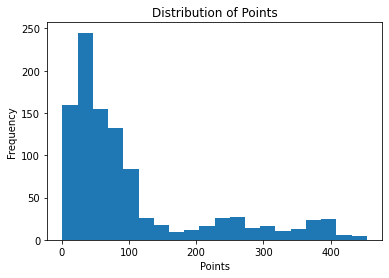

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dataset_EDA['PTS'], bins=20)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of Points')
plt.show()


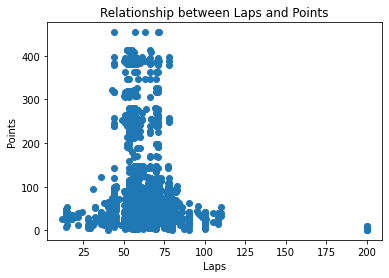

In [ ]:
plt.scatter(dataset_EDA['Laps'], dataset_EDA['PTS'])
plt.xlabel('Laps')
plt.ylabel('Points')
plt.title('Relationship between Laps and Points')
plt.show()


Lap more than 125 will be outliers

In [ ]:
dataset_EDA = dataset_EDA[dataset_EDA['Laps']<=125]
dataset_EDA

,Pos,Driver,Nationality,Car_x,PTS,year,Grand_Prix,Car_y,Time_x,Date,Winner,Car,Laps,Time_y
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950,Great Britain,Alfa Romeo,1:50.600,13 May 1950,Nino Farina FAR,Alfa Romeo,70.0,2:13:23.600
1,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950,Switzerland,Alfa Romeo,2:41.600,04 Jun 1950,Nino Farina FAR,Alfa Romeo,42.0,2:02:53.700
2,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950,Belgium,Alfa Romeo,4:34.100,18 Jun 1950,Juan Manuel Fangio FAN,Alfa Romeo,35.0,2:47:26.000
3,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950,Monaco,Alfa Romeo,1:51.000,21 May 1950,Juan Manuel Fangio FAN,Alfa Romeo,100.0,3:13:18.700
4,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950,France,Alfa Romeo,2:35.600,02 Jul 1950,Juan Manuel Fangio FAN,Alfa Romeo,64.0,2:57:52.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,6,Lewis Hamilton HAM,GBR,Mercedes,240.0,2022,Great Britain,Mercedes,1:30.510,03 Jul 2022,Carlos Sainz SAI,Ferrari,52.0,2:17:50.311
1019,6,Lewis Hamilton HAM,GBR,Mercedes,240.0,2022,Hungary,Mercedes,1:21.386,31 Jul 2022,Max Verstappen VER,Red Bull Racing RBPT,70.0,1:39:35.912
1020,7,Lando Norris NOR,GBR,McLaren Mercedes,122.0,2022,Monaco,McLaren Mercedes,1:14.693,29 May 2022,Sergio Perez PER,Red Bull Racing RBPT,64.0,1:56:30.265
1021,7,Lando Norris NOR,GBR,McLaren Mercedes,122.0,2022,Abu Dhabi,McLaren Mercedes,1:28.391,20 Nov 2022,Max Verstappen VER,Red Bull Racing RBPT,58.0,1:27:45.914


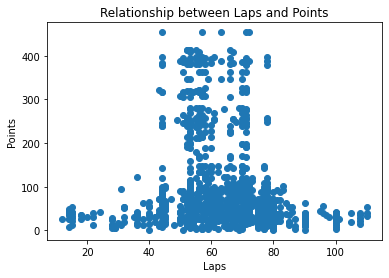

In [ ]:
plt.scatter(dataset_EDA['Laps'], dataset_EDA['PTS'])
plt.xlabel('Laps')
plt.ylabel('Points')
plt.title('Relationship between Laps and Points')
plt.show()


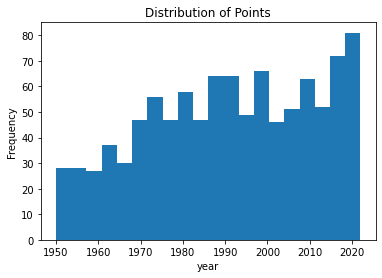

In [ ]:

plt.hist(dataset_EDA['year'], bins=20)
plt.xlabel('year')
plt.ylabel('Frequency')
plt.title('Distribution of Points')
plt.show()
